In [70]:
from IPython.display import display, Markdown, Latex
from decimal import Decimal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import stats
import numpy as np
import pandas as pd
import math as mt

# Solutions to Physics of Nuclear Energy Problems 
by *Nora Salone* 

### Problem 4.1

Absorption of neutrons in the fuel, $^{235}U+ ^{238}U$, leads in some cases to fission which gives new fast
neutrons.
Derive the formula for $\eta$, the effective number of fission neutrons per one neutron absorbed in fuel

$$\eta = \nu_{235}\frac{e\sigma_{f235}}{e(\sigma_f+\sigma_c)_{235}+(1-e)\sigma_{a238}},\qquad e=\frac{N_{235}}{N_{235}+N_{238}}
$$

in terms of the enrichment $e$.

$$\eta = \frac{\text{# fast n by fission}}{\text{# thermal n absorbed in fuel}} = \nu P_f$$

where $\nu=\nu_{235}$ is the average number of produced neutrons by $^{235} U$ fission, $P_f$ is the fission probability, defined in term of fission and absorption (and capture) macroscopic cross-sections as

$$p_f = \frac{\Sigma_f}{\Sigma_a} = \frac{\Sigma_f}{\Sigma_f +\Sigma_c}$$

Using cross-sections for thermal neutrons, this makes $\eta$

$$\nu_{235} \frac{\Sigma_f}{\Sigma_f +\Sigma_c}=\nu_{235}\frac{N_{235}\sigma_{f235}}{N_{235}(\sigma_f+\sigma_c)_{235}+N_{238}\sigma_{c238}}\frac{N_{235}+N_{238}}{N_{235}+N_{238}} = \nu_{235}\frac{\sigma_{f235}}{\frac{N_{235}(\sigma_f+\sigma_c)_{235}+N_{238}\sigma_{c238}}{N_{235}+N_{238}}}\frac{N_{235}}{N_{235}+N_{238}}=\\
=\nu_{235}\frac{e\sigma_{f235}}{e(\sigma_f+\sigma_c)_{235}+(1-e)\sigma_{a238}}$$

by using the abovementioned definition of enrichment. Note how in case of fresh $U$ fuel we are assuming as fissile only $^{235}U$, meaning that $\sigma_{a238}=\sigma_{c238}$.

a. Study how the fission factor depends on the enrichment and determine the value at an
enrichment of 0.7, 1.0, 2.0 and 3 %.

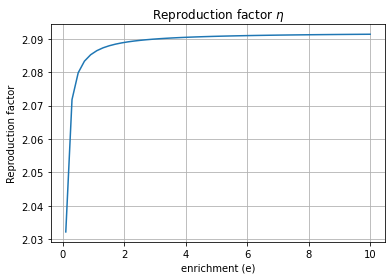

In [71]:
# Data for plotting
e = np.linspace(0.1, 10.0, 50, endpoint=True)
sigma_f235 = 583.0 #barn
sigma_c235 = 99.0 #barn
sigma_c238 = 2.0 #barn
nu = 2.44 #for uranium

eta = nu*e*sigma_f235/(e*(sigma_f235+sigma_c235)+(1-e)*sigma_c238)
fig, ax = plt.subplots()
ax.plot(e, eta)

ax.set(xlabel='enrichment (e)', ylabel='Reproduction factor',
       title='Reproduction factor $\eta$')
ax.grid()

plt.show()

In [72]:
data=[0.7,1.0,2.0,3.0]
results=[]

def eta_f(e):
    return nu*e*sigma_f235/(e*(sigma_f235+sigma_c235)+(1-e)*sigma_c238)

for i in range(len(data)):
    results.append([data[i],eta_f(data[i])])

print(results)

[[0.7, 2.0831882845188283], [1.0, 2.0858064516129033], [2.0, 2.088869309838473], [3.0, 2.089892262487757]]


In [73]:
Dane=np.array([["",'2.083','2.085','2.089','2.090']])
 
Dane_display= pd.DataFrame(Dane,columns=['$e$ =','0.7', '1.0','2.0','3.0'],index=['$\eta$'])
display(Dane_display)

,$e$ =,0.7,1.0,2.0,3.0
$\eta$,,2.083,2.085,2.089,2.090


b. Calculate the value of the fission factor for highly enriched uranium and plutonium fissioned by thermal and fast neutrons (2 MeV).

For the fission factor for thermal neutrons, we can use the same formula above for the highly enriched uranium, i.e. $e \sim 20\%$; for the respective fast fission factor $\epsilon$, we just replace the thermal microscopic cross-sections with fast neutron cross-sections for uranium.

In [74]:
nu = 2.44 #for uranium
e=20.0 #highly enriched uranium
results=[]

def eta_f(e):
    return nu*e*sigma_f235/(e*(sigma_f235+sigma_c235)+(1-e)*sigma_c238)

#thermal neutrons
sigma_f235 = 583.0 #barn
sigma_c235 = 99.0 #barn
sigma_c238 = 2.0 #barn
results.append(eta_f(e))

#fast neutrons
sigma_f235 = 1.0 #barn
sigma_c235 = 0.09 #barn
sigma_c238 = 0.07 #barn
results.append(eta_f(e))

print("thermal,","fast")
print(results)

thermal, fast
[2.091633583296574, 2.3839765510503175]


We calculate from scratch $\eta$ for plutonium, then we replace the thermal cross sections with fast neutron cross sections to obtain $\epsilon$:

$$\eta = \nu_{239}\frac{\Sigma_{f239}}{\Sigma_{a239}}= \nu_{239}\frac{N_{239}\sigma_{f239}}{N_{239}(\sigma_f+\sigma_c)_{239}}=\nu_{239}\frac{\sigma_{f239}}{(\sigma_f+\sigma_c)_{239}}$$

In [75]:
nu = 2.90 #for uranium
results=[]

def eta_fp(e):
    return nu*sigma_f239/(sigma_f239+sigma_c239)

#thermal neutrons
sigma_f239 = 748.0 #barn
sigma_c239 = 269.0 #barn
results.append(eta_fp(e))

#fast neutrons
sigma_f239 = 2.0 #barn
sigma_c239 = 0.05 #barn
results.append(eta_fp(e))

print("thermal,","fast")
print(results)

thermal, fast
[2.1329400196656834, 2.829268292682927]


In [76]:
Dane=np.array([["",'2.092','2.833'],["",'2.133','2.829']])
 
Dane_display= pd.DataFrame(Dane,columns=['','$^{235}U$','$^{239}Pu$'],index=['$\eta$','$\epsilon$'])
display(Dane_display)

,,$^{235}U$,$^{239}Pu$
$\eta$,,2.092,2.833
$\epsilon$,,2.133,2.829


### Problem 4.2
Stainless steel, type 304 having a density of $7.86$ $\text{g}/\text{cm}^3$, has been used in some reactors. The nominal composition by weight of this material is as follows: carbon, 0.08%; chromium, 19%; nickel, 10%; iron, the remainder. Calculate the macroscopic absorption cross-section of SS-304 at 0.0253 eV, given

* Density, $\rho = 7.86$ $\text{g}/\text{cm}^3$;
* Weight fraction of carbon, $w_C$ = 0.08 %;
* Weight fraction of chromium, $w_{Cr}$ = 19 %;
* Weight fraction of nickel, $w_{Ni}$ = 10 %;
* Weight fraction of iron, $w_{Fe}$ = 100% - $w_C$ - $w_{Cr}$ - $w_{Ni}$.

The macroscopic absorption cross-section of SS-304 is defined in terms of the microscopic absorption cross-sections $\sigma_{a,i}$ and the atomic number densities $N_i$ of the different components as

$$\Sigma_a = \sum_i \sigma_{a,i} N_i = \sum_i \sigma_{a,i} \rho_i\frac{N_A}{M_i} = \sum_i \sigma_{a,i} \rho w_i\frac{N_A}{M_i}$$

where $w_i$ are the nominal compositions by weight of SS-304 and are thus expressed as fraction of SS-304 density $\rho$.

In [77]:
N_A = 6.02214076*10**(23) #Avogadro's number, mol^{-1}
rho = 7.86 # g/cm^3 SS-304 mass density 

def N(w,M):
    return rho*w*N_A/M # atomic number density, cm^{-3}

atom_dens=[]
w=np.divide([0.08,19.0,10.0,100.0-(0.08+19.0+10.0)],100.0) # to calculate weights in percentage of [C, Cr, Ni, Fe]
M=[12.01115,51.996,58.71,55.847] # molar masses of [C, Cr, Ni, Fe], g/mol

for i in range(len(w)):
    atom_dens.append(N(w[i],M[i]))
    
def Sigma(sigma,N):
    return sigma*N # macroscopic (absorption) cross-section

mac_xs = []
mic_xs = np.multiply([0.0034, 3.1, 4.43, 2.55],pow(10,-24)) # microscopic xs at E = 0.0253 eV, in cm^2 (barn = 10^{-24} cm^2)

for i in range(len(mic_xs)):
    mac_xs.append(Sigma(mic_xs[i],atom_dens[i]))

print(w)
print(atom_dens)
print(mic_xs)
print(mac_xs)

Sigma_t=np.sum(mac_xs) # in cm^{-1} 
print(Sigma_t) #total absorption macroscopic xs

[0.0008 0.19   0.1    0.7092]
[3.152672400134875e+20, 1.729645551770136e+22, 8.062344808993357e+21, 6.010939084311981e+22]
[3.40e-27 3.10e-24 4.43e-24 2.55e-24]
[1.0719086160458573e-06, 0.053619012104874214, 0.03571618750384057, 0.1532789466499555]
0.24261521816728635


In [78]:
Dane=np.array([["",'$3.153 \times 10^{20}$','$1.730 \times 10^{22}$','$8.062 \times 10^{21}$','$6.011 \times 10^{22}$',''],["",'$1.072 \times 10^{-6}$','$0.054$','$0.036$','$0.153$',''],['','','','','','$0.243$']])
 
Dane_display= pd.DataFrame(Dane,columns=['element','$C$','$Cr$', '$Ni$', '$Fe$','SS-304'],index=['$N_i$ $(cm^{-3})$','$\Sigma_i$ $(cm^{-1})$','$\Sigma_a$ $(cm^{-1})$'])
display(Dane_display)

,element,$C$,$Cr$,$Ni$,$Fe$,SS-304
$N_i$ $(cm^{-3})$,,$3.153 \times 10^{20}$,$1.730 \times 10^{22}$,$8.062 \times 10^{21}$,$6.011 \times 10^{22}$,
$\Sigma_i$ $(cm^{-1})$,,$1.072 \times 10^{-6}$,$0.054$,$0.036$,$0.153$,
$\Sigma_a$ $(cm^{-1})$,,,,,,$0.243$


### Problem 4.3
Derive the optimal algorithm $f^{*}(X)$ assuming $L(f(X), Y) = |(f(X) -Y)|$

### Problem 4.4
Measurements on an experimental thermal reactor show that, for every 100 neutrons emitted in fission, 10 escape while slowing down and 15 escape after having slowed down to thermal energies. No neutrons are absorbed within the reactor while slowing 
down. Of those neutrons absorbed at thermal energies, 60% are absorbed in fission material. 
* a. What is the multiplication factor of the reactor at the time these observations are made?
* b. Suppose the thermal leakage is reduced by one third. How would this change the value of $k$?

Note: The values of $\eta$ and $\nu$ for the reactor fuel are 2.07 and 2.42, respectively.

Given:
* Normalised number of neutrons in one generation, $N_0$ = 100;
* Number (per 100) of fast neutrons leaking the system while slowing down, NFL = 10;
* Number (per 100) of thermal neutrons leaking the system, NTL = 15;
* Resonance escape probability, p = 1 ($0$ neutrons are absorbed while slowing down);
* Thermal utilisation factor, f = 0.6;
* Reproduction factor, $\eta$ = 2.07;
* Number fission neutrons, , $\nu$ = 2.42;
* Thermal neutron leakage reduction fraction, r = 1/3.

* a. The multiplication factor is calculated as the ratio of the number of neutrons produced in one generation to the number of neutrons of the previous generation (in case of the first cycle, to the initial number of neutrons $N_0$). It can be computed directly throught the specifics of the reactor using

$$k = \epsilon \cdot P_f \cdot P_t \cdot p \cdot f \cdot \eta$$

where $\epsilon$ is the fast fission factor, $P_f$ is the probability of non-fast leakage (likelihood of fast neutrons to not leak out of the reactor), $P_t$ is the probability of non-thermal leakage (same with thermal neutrons), $p$ is the probability of the neutrons to escape resonance capture while slowing down, $f$ is the ratio of neutrons effectively absorbed by the fuel to the total number of absorbed neutrons and $\eta$ is the ratio of fast neutrons produced by fission to the total number of fuel-absorbed netrons. We assume $\epsilon = 1$, i.e. no neutrons of the first generation undergo fast fission.

In [79]:
N_0 = 100 # initial number of neutrons
NFL = 10 # fast neutrons leaked
NTL = 15 # thermal neutrons leaked
epsilon = 1
P_f = (N_0-NFL)/N_0
P_t = (N_0-NFL-NTL)/(N_0-NFL)
p = 1
f = 0.6
eta = 2.07
k = epsilon*P_f*P_t*p*f*eta # multiplication factor

print(k)

#check with ratio of final to initial neutron numbers
print(((N_0-NFL-NTL)*0.6*2.07)/N_0)

NTL = NTL*2/3 # fewer thermal neutrons leak: number reduced by 1/3
P_t = (N_0-NFL-NTL)/(N_0-NFL)
epsilon*P_f*P_t*p*f*eta

0.9314999999999999
0.9314999999999999


0.9935999999999998

The value of the multiplication factor $k$ is 

$$k = 0.9315$$

and it matches to the ratio of number of initial neutrons to number of final neutrons.

* b. If the thermal leakage is reduced by 1/3, we only need to replace $NTL$ with $NTL\frac{2}{3}$, since reduced thermal leakage means fewer thermal neutrons leak. Since $P_t$ (the likelihood to avoid thermal leakage) increases and overall $k$ also increases, we get

$$k = 0.9936$$

### Problem 4.5
Calculate the prompt neutron lifetime in an infinite, critical thermal reactor at 100 ºC consisting of a homogeneous mixture of $^{235}U$ and the commercial heavy water. Take the resonance escape probability in such a reactor as 0.87, and the fast fission factor as 1.02 and assume that the commercial heavy water is 1/v absorber.

For an infinite, critical reactor the multiplication factor is $k_\infty = 1$. The homogeneous mixture in the reactor is $^{235}U + D_2 O$ where $F= ^{235}U$ is the fuel and $M = D_2 O$ is the moderator. For a thermal reactor, one can assume that between the slowing down time $t_s$ and the diffusion time $t_d$ it holds that

$$t_s << t_d \qquad \Longrightarrow \qquad l_p = t_s + t_d \approx t_d $$

where $l_p$ is the prompt neutron lifetime. Furthermore, the diffusion time is defined as

$$t_d = \frac{\lambda_a}{v} = \frac{1}{\Sigma_a v}$$

with mean free path $\lambda_a$ and absorption macroscopic cross-section $\Sigma_a$. We express the latter using the thermal neutron utilization factor

$$ f = \frac{\Sigma_a^F}{\Sigma_a^{TOT}} = \frac{\Sigma_a^F}{\Sigma_a^F + \Sigma_a^M} \qquad \Longrightarrow \qquad \Sigma_a^{TOT} = \frac{\Sigma_a^M}{1-f}$$

Gathering everything together, the prompt neutron lifetime becomes

$$l_p = \frac{1}{\Sigma_a v} = \frac{1-f}{\Sigma_a^M v} = \frac{1-f}{\Sigma_{a,0}^M v_0}$$

In a 1/v absorbing medium, we use macroscopic cross-sections $\Sigma_{a,0}^M$, which are tabulated for the most probable velocity $v_0=2200$ $m/s$ (for a thermal reactor at 100 °C. We compute the macroscopic cross-sections as in problem 4.2 in terms of mass density, molar mass and Avogadro number.

In [99]:
w = 1 # we have the density of the whole component, we don't need weights here

#uranium
rho = 19.1 # uranium mass density g/cm^3
M = 235.04 # uranium-235 molar mass g/mol
atom_dens=N(w,M) # cm^{-3}

#thermal neutrons
sigma_f235 = 583.0 #barn
sigma_c235 = 99.0 #barn
sigma = (sigma_f235 + sigma_c235)*10**(-24) # absorption microscopic xs for fuel = uranium-235 in cm^{2}
Sigma_F=Sigma(sigma,atom_dens) # F = fuel, cm^{-1}

#heavy water
rho = 1.11 # heavy water mass density g/cm^3
M = (2*2.01410177811 + 15.99903) # heavy water molar mass g/mol
atom_dens= N(w,M) # cm^{-3}

#thermal neutrons
sigma_aD = 3*10**(-4) #barn
sigma_aO = 1*10**(-4) #barn
sigma = (2*sigma_aD + sigma_aO)*10**(-24) # absorption microscopic xs for moderator = heavy water in cm^{2}
Sigma_M=Sigma(sigma,atom_dens) # M = moderator, cm^{-1}

f = Sigma_F/(Sigma_F+Sigma_M) # thermal utilization factor

v_0 = 2200*10**2 #most probable velocity, cm/s
l_d = (1-f)/(Sigma_M*v_0) # prompt neutron lifetime

print("The prompt neutron lifetime is",l_d,".")

The prompt neutron lifetime is 1.361915458065172e-07 .


### Problem 4.6

Express the following reactivities of a $^{233}U$-fueled thermal reactor in dollars:
* a) 0.001
* b) 4%
* c) −0.01

To express reactivity in $\$$, we take the reactivity $\rho = \frac{k-1}{k}$ and we divide it by the delayed neutrons fraction $\beta$, which for $^{233}U$ is $\beta =0.00281$.

In [109]:
reactivity=[0.001,0.04,-0.01]
beta = 0.00281
results=[]

def dollars(rho):
    return rho/beta

for i in range(len(reactivity)):
    results.append(dollars(reactivity[i]))
    
print(results)

Dane=np.array([['0.001','0.35587'],['0.04','14.235'],['-0.01','-3.5587']])
 
Dane_display= pd.DataFrame(Dane,columns=['reactivity $\rho$','reactivity $\$$'],index=['a)','b)','c)'])
display(Dane_display)

[0.35587188612099646, 14.234875444839858, -3.5587188612099645]


,reactivity $\rho$,reactivity $\$$
a),0.001,0.35587
b),0.04,14.235
c),-0.01,-3.5587


### Problem 4.7

 Let X and Y have a joint PDF fXY (x,y) = x+y for 0 <x<1, 0<y<1
 
* Find conditional PDF fY|X (y|x)

* Show that the integral of fY|X (y|x) over all y values is equal to 1

The conditional PDF is
$$f_{Y|X}(y|x)=\frac{f_{XY}(x,y)}{f_X(x)}$$
with joint PDF $f_{XY}(x,y)$.

The given joint PDF is $$f_{XY}(x,y)=x+y, \qquad 0<x<1, 0<y<1\\
0 \qquad \text{otherwise}$$.
The marginal distribution $f_X(x)$ is found by
$$f_X(x)=\int_{-\infty}^\infty f_{XY}(x,y) dy = \int_0^1 (x+y) dy = \frac{y^2}{2}+yx\bigg|_0^1 = \frac{1}{2}+x, \qquad 0<x<1$$
since outside that interval $f_{XY}(x,y)$ takes 0 value. This makes the conditional PDF
$$f_{Y|X}(y|x)=2\frac{x+y}{1+2x}, \qquad 0<x<1, 0<y<1$$

Integrating over all $y$ values:

$$\int_0^1 f_{Y|X}(y|x)dy=2\int_0^1\frac{x+y}{1+2x}dy=\frac{2}{1+2x}\bigg(\frac{y^2}{2}+yx\bigg)_0^1=\frac{1}{\frac{1}{2}+x}\bigg(\frac{1}{2}+x\bigg)=1
$$

### Problem 4.8

Show that:

* Cov[X,Y] = E[XY] – E[X]E[Y]

* Var[X+Y] = Var[X] + Var[Y] + 2 Cov[X,Y]

$Cov(X,Y)$$=E[(X-E[X])(Y-E[Y])]\\
         =E[XY-XE[Y]-E[X]Y+E[X]E[Y]\\
         =E[XY]-E[X]E[Y]-E[X]E[Y]+E[X]E[Y]\\
         =E[XY]-E[X]E[Y]$

$Var(X+Y)$$=E[(X+Y)^2]-E[X+Y]^2\\
          =E[X^2]+2E[XY]+E[Y^2]-(E[X]+E[Y])^2\\
          =E[X^2]+2E[XY]+E[Y^2]-E[X]^2-2E[X]E[Y]-E[Y]^2\\
          =Var[X]+Var[Y]+2E[XY]-2E[X]E[Y]\\
          =Var[X]+Var[Y]+2Cov(X,Y)$

Both expressions were showed to be true exploiting the linearity of $E[X]$ and the fact that $E[E[X]]=E[X]$ for an arbitrary random variable $X$. The last line of the second proof is obtained by employing the definitions of covariance and variance.

### Problem 25

Rolling a die Ω = { 1 , 2 , 3 , 4 , 5, 6 }

X is 1 if even number 0 otherwise.

Y is 1 if prime number 0 otherwise.

* Calculate E[Y|1], E[Y|0]

* Var[Y|1], Var[Y|0]

Note that for the conditional PMF we use the same values in ex. 21, since the event space is the same.

$$E[Y|1]=\sum_r r\cdot p_{Y|X}[r|1]=0\cdot p_{Y|X}[0|1]+p_{Y|X}[1|1]=\frac{1}{3}$$

$$E[Y|0]=\sum_r r\cdot p_{Y|X}[r|0]=p_{Y|X}[1|0]=\frac{2}{3}$$

$$Var[Y|1]=\sum_r (r-E[Y|1])^2 p_{Y|X}[r|1]=E[Y|1]^2 p_{Y|X}[0|1]+(1-E[Y|1])^2 p_{Y|X}[1|1]=\\
=\frac{1}{9}\frac{2}{3}+\frac{4}{9}\frac{1}{3}=\frac{2}{9}$$

$$Var[Y|0]=\sum_r (r-E[Y|0])^2 p_{Y|X}[r|0]=E[Y|0]^2 p_{Y|X}[0|0]+(1-E[Y|0])^2 p_{Y|X}[0|1]=\\
=\frac{4}{9}\frac{1}{3}+\frac{1}{9}\frac{2}{3}=\frac{2}{9}$$